# Välkommen att använda Jupyter Notebooks!

I denna notebook går vi genom ett exempel på dataanalys med Python, där vi skapar en graf över månadernas medeltemperaturer i Helsingfors 2020. Detta är avsett att vara ett kort exempel, som visar vad som är möjligt att göra med Jupyter Notebook och Python. Du kan också ta en titt på [detta exempel](https://mybinder.org/v2/gh/opendata-education/opendata-education.github.io/HEAD?filepath=examples%2Fdata-analyysi_esimerkki.ipynb), där du får handledning att börja skriva egen kod.

Innan vi skrider till verket tar vi en titt på själva Jupyter Notebook-basen. En Notebookfil består av **celler**, som kan innehålla antingen text (markdown) eller kod. Detta är en textcell, och du kan ändra på den om du dubbelklickar den (Testa!). När cellen är öppnad i *edit mode* kan du köra den med **Run**-knappen i menyn ovan, eller med knappkombinationen **Ctrl + Enter**, så processeras texten.

En kodcell körs på samma sätt. Du känner igen kodcellerna på `In [ ]:`-texten till vänster. När en kodcell har körts får den ett index/ordningstal.

In [16]:
# Detta är en kodcell
# Den gör ingenting, för den innehåller ingen kod, men du kan köra den ändå.

Då går vi vidare till dataanalys-exemplet. Koden i exemplet är fullständig, så du kan köra kodcellerna som de är. Du kan också fritt koda själv eller ändra något i koden.

Vi börjar med att så kortfattat som möjligt visualisera datan. Detta kräver bara fyra rader kod. Vi läser in två funktionspaket med **import**-kommandot, vi läser in en datafil i csv-format med **pd.read_csv**-kommandot, och ritar upp en graf med **plt.plot**

Kör kodcellen nedan, till exempel genom att klicka på den och trycka **Ctrl + Enter**. Den borde ge en graf.

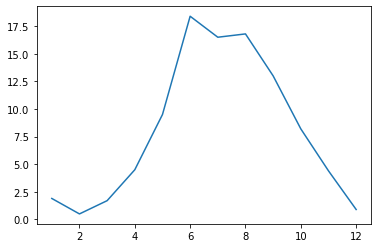

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('keskilampotila2020_Helsinki.csv')
plt.plot(data['Kk'], data['Keskilämpötila (°C)'])

Det krävs alltså inte mycket för att få till en visualisering av datan. Grafen du nyss ritade berättar dock inte så mycket ännu. Vi tar ett exempel där vi förbättrar den.

Du kan köra alla celler nedan i tur och ordning. Du kan gärna läsa koden och sträva efter att förstå alla element, och om du vill kan du ändra på den också. Raderna som börjar med **#** -tecken är *kommentarer* som inte påverkar själva koden, men hjälper för att förklara den.

In [3]:
# Vi läser in paketen som behövs
import matplotlib.pyplot as plt
import pandas as pd

# Vi läser in data ur filen 'Medeltemperatur2020_Helsingfors.csv'
# och sparar informationen som variabeln 'data'.
data = pd.read_csv('Medeltemperatur2020_Helsingfors.csv')

# Vi skriver ut en förhandsvisning av datan. .head-kommandot visar de första raderna av tabellen.
data.head()

,Ar,Manad,Medeltemperatur (Celsius)
0,2020,1,1.9
1,2020,2,0.5
2,2020,3,1.7
3,2020,4,4.5
4,2020,5,9.5


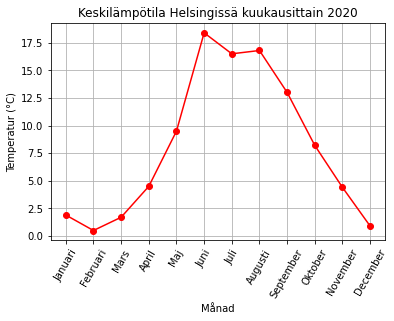

In [9]:
# Vi väljer 'Manad'-kolumnen och 'Medeltemperatur (Celsius)'-kolumnen
# och sparar dem som variablerna 'man' och 'temp'
man = data['Manad']
temp = data['Medeltemperatur (Celsius)']


# Vi skapar en graf med månaderna på x-axeln och temperaturerna på y-axeln.
# Vi kan justera grafens utseende: 'r-' betyder "red line" och 'o' betyder att punkterna märks med bollar. 
plt.plot(man, temp, 'r-', marker='o')

# Vi namnger koordinataxlarna
plt.xlabel('Månad')
plt.ylabel('Temperatur (°C)')

# Vi ger grafen en titel
plt.title('Keskilämpötila Helsingissä kuukausittain 2020')

# Vi gör en lista på markeringarna för x-axeln.
markeringar = ['Januari','Februari','Mars','April','Maj','Juni','Juli','Augusti','September','Oktober','November','December']

# Vi ska göra så att x-axeln har månadsnamn istället för en sifferskala.
# range(1,13) skapar en lista med talen 1-12 eftersom python inte inkluderar "the stop number".
# Sedan lägger vi till variabeln 'markeringar', som innehåller månadernas namn.
#Slutligen vänder vi på markeringarna, så att de inte skrivs på varandra.
plt.xticks(range(1,13), markeringar, rotation=60)

# Vi sätter till ett rutsystem i bakgrunden 
plt.grid()

# Vi avslutar med plt.show- kommandot som gör att grafen visas.
plt.show()

Det finns många möjligheter när det gäller att snygga till en graf, och vi kan inte gå genom alla här. Man behöver studera grafen och undersöka vad som behövs för att den ska bli tydligare. Med hjälp av google hittar man oftast rätt metoder bara man vet vad man vill göra.

> Testa gärna att ändra något i koden ovan, kör cellen på nytt och se vad som händer. En praktisk sak med Jupyter Notebooks är att de är interaktiva, och du kan ändra vad som helst utan att det påverkar originalet. Om du vill spara dina ändringar kan du ladda ned din version av filen om du väljer **File** $\rightarrow$ **Download as** $\rightarrow$ **Notebook (.ipynb)**

## Histogram

Vi tar ett andra exempel på visualisering av data. Den här gången ska vi rita ett histogram utgående från uppmätta temperaturer i Helsingfors januari 2021. För detta ändamål har vi hämtat information från Meteorologiska Institutets söktjänst. Datan består av mätningar gjorda med 10 minuters mellanrum, så det finns massor av värden att behandla.

In [10]:
# Vi läser in de paket som behövs
import matplotlib.pyplot as plt
import pandas as pd

# Vi läser in data ur filen 'lampotila_tammikuu2021_Helsinki.csv'
# och vi sparar informationen som variabeln 'data'.
data = pd.read_csv('lampotila_tammikuu2021_Helsinki.csv')

# Vi skriver ut de första raderna av tabellen, så att vi ser vad vi arbetar med.
data.head()

,Vuosi,Kk,Pv,Klo,Aikavyöhyke,Sademäärä (mm),Lumensyvyys (cm),Ilman lämpötila (degC),Tuulen nopeus (m/s)
0,2021,1,1,00:00,UTC,0.0,0.0,0.4,1.7
1,2021,1,1,00:10,UTC,NaN,0.0,0.4,1.5
2,2021,1,1,00:20,UTC,NaN,0.0,0.4,1.1
3,2021,1,1,00:30,UTC,NaN,0.0,0.4,0.9
4,2021,1,1,00:40,UTC,NaN,0.0,0.5,1.1


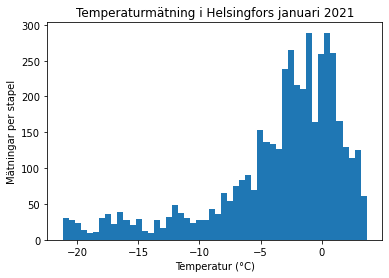

In [11]:
# Vi väjer kolumnen med lufttemperaturer: 'Ilman lämpötila (degC)'
# och vi sparar den som variabeln 'temp'
temp = data['Ilman lämpötila (degC)']

# Vi skapar ett histogram, och väljer till en början at ha 50 staplar.
plt.hist(temp, bins=50)

# Vi namnger koordinataxlarna
plt.xlabel('Temperatur (°C)')
plt.ylabel('Mätningar per stapel')

# Vi lägger till en rubrik för diagrammet
plt.title('Temperaturmätning i Helsingfors januari 2021')

# Vi visar grafen med plt.show()
plt.show()

Vi lyckades få ett histogram. Nu vill vi göra det tydligare. Vi kan till exempel göra så att varje stapels bredd motsvarar en grad Celsius.

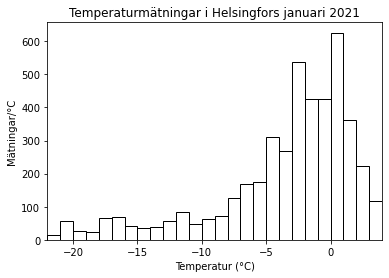

In [15]:
# Vi ritar ett histogram i intervallet -22 degC ... 4 degC, , så vi behöver 26 staplar.
# Parametern fill=False gör så att staplarna blir lättare att urskilja, då bara staplarnas konturer syns.
plt.hist(temp, bins=26, range=(-22,4), fill=False)

# Vi begränsar x-axeln till samma intervall som histogrammet.
plt.xlim((-22,4))

plt.xlabel('Temperatur (°C)')
plt.ylabel('Mätningar/°C')
plt.title('Temperaturmätningar i Helsingfors januari 2021')


# Vi visar grafen med plt.show()
plt.show()

I datafilen vi behandlade här finns också andra data, bland annat vindhastighet och snödjup. Testa rita en graf eller histogram över någon annan av kolumnerna. Du kan också leta upp något dataset själv, och läsa in det med hjälp av **read_csv**-kommandot.